# Data Preparation

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


In [33]:
df = pd.read_csv('course_lead_scoring.csv')

In [34]:
df.head(2)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0


In [35]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [36]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [37]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [38]:
df[categorical] = df[categorical].fillna('NA')

In [39]:
df[numerical] = df[numerical].fillna(0.0)

In [40]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [41]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [42]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

# Q1

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

better_result = 0
better_numerical = None

for n in numerical:
    result = roc_auc_score(y_train, df_train[n])

    if result < 0.5:
        result = roc_auc_score(y_train, -df_train[n])

    print(n, round(result, 3))

    if result > better_result:
        better_result = result
        better_numerical = n

print('Better numerical: ', better_numerical)
print('Better result: ', round(better_result, 3))

number_of_courses_viewed 0.764
annual_income 0.552
interaction_count 0.738
lead_score 0.614
Better numerical:  number_of_courses_viewed
Better result:  0.764


## Answer = number_of_courses_viewed

# Q2

In [44]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)


In [45]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [46]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [47]:
y_pred = model.predict_proba(X_val)[:, 1]
hard_pred = (y_pred >= 0.5)

In [48]:
hard_pred[:5]

array([ True, False,  True,  True,  True])

In [49]:
(y_val == hard_pred).mean()

np.float64(0.6996587030716723)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred >= 0.5)

0.6996587030716723

In [51]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [52]:
from sklearn.metrics import auc
round(auc(fpr, tpr),3)

0.817

## Answer = 0.72

# Q3

0.00 0.584 1.000
0.01 0.584 1.000
0.02 0.584 1.000
0.03 0.584 1.000
0.04 0.584 1.000
0.05 0.584 1.000
0.06 0.584 1.000
0.07 0.584 1.000
0.08 0.584 1.000
0.09 0.584 1.000
0.10 0.584 1.000
0.11 0.584 1.000
0.12 0.584 1.000
0.13 0.584 1.000
0.14 0.584 1.000
0.15 0.584 1.000
0.16 0.584 1.000
0.17 0.584 1.000
0.18 0.584 1.000
0.19 0.584 1.000
0.20 0.584 1.000
0.21 0.584 1.000
0.22 0.584 1.000
0.23 0.584 1.000
0.24 0.584 1.000
0.25 0.584 1.000
0.26 0.586 1.000
0.27 0.586 1.000
0.28 0.588 1.000
0.29 0.590 1.000
0.30 0.590 1.000
0.31 0.590 1.000
0.32 0.592 1.000
0.33 0.592 1.000
0.34 0.594 1.000
0.35 0.596 1.000
0.36 0.598 1.000
0.37 0.600 1.000
0.38 0.604 1.000
0.39 0.615 1.000
0.40 0.618 0.994
0.41 0.623 0.994
0.42 0.632 0.994
0.43 0.639 0.994
0.44 0.649 0.994
0.45 0.653 0.988
0.46 0.653 0.988
0.47 0.664 0.971
0.48 0.667 0.971
0.49 0.671 0.965
0.51 0.674 0.953
0.52 0.682 0.953
0.53 0.700 0.942
0.54 0.702 0.936
0.55 0.713 0.930
0.56 0.725 0.924
0.57 0.727 0.918
0.58 0.733 0.901
0.59 0.737 0.9

/tmp/ipykernel_13883/3574673888.py:18: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


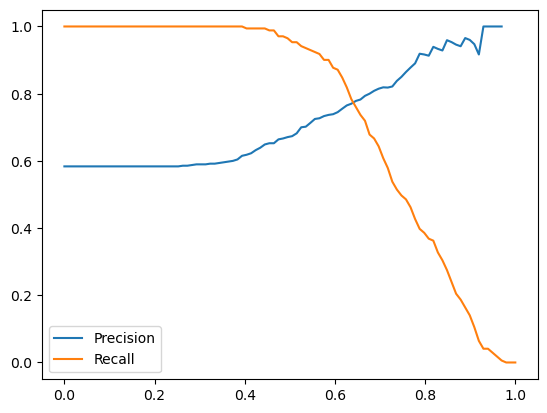

In [55]:
thresholds = np.linspace(0, 1, 100)
precision_list = []
recall_list = []

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:
  predict_positive = (y_pred >= t)
  predict_negative = (y_pred < t)

  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  p = tp / (tp + fp)
  r = tp / (tp + fn)

  precision_list.append(p)
  recall_list.append(r)

  print('%.2f %.3f %.3f' % (t, p, r))

plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.legend()


## Answer = 0.545

# Q4

In [56]:
thresholds = np.linspace(0, 1, 100)

best_f1 = 0
best_t = 0

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:
  predict_positive = (y_pred >= t)
  predict_negative = (y_pred < t)

  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  p = tp / (tp + fp)
  r = tp / (tp + fn)

  f1 = 2 * p * r / (p + r)

  if f1 > best_f1:
    best_f1 = f1
    best_t = t

  #print('%.2f %.3f %.3f %.3f' % (t, p, r, f1))

print('Best t: ', best_t)
print('Best f1: ', best_f1)

Best t:  0.5555555555555556
Best f1:  0.8123393316195373


/tmp/ipykernel_13883/3979477270.py:19: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


## Answer = 0.54

# Q5

In [57]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [58]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [59]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

/home/maxkaizo/miniconda3/envs/ml25/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [61]:
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(df_full_train):

  df_train = df_full_train.iloc[train_idx]
  df_val = df_full_train.iloc[val_idx]

  y_train = df_train.converted.values
  y_val = df_val.converted.values

  dv, model = train(df_train, y_train)
  y_pred = predict(df_val, dv, model)

  # print(y_pred)

  auc = roc_auc_score(y_val, y_pred)
  scores.append(auc)

print(scores)
print(np.std(scores))

[0.8060745924216483, 0.8713738368910783, 0.7754320118852139, 0.8018368617683685, 0.8558272713202291]
0.03580711942905165


## Answer = 0.36

# Q6

In [63]:
n_splits = 5

for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

100%|██████████| 3/3 [00:00<00:00, 15.31it/s]

C=1e-06 0.560 +- 0.024
C=0.001 0.867 +- 0.029
C=1 0.822 +- 0.036
